In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.plotly import plot_mpl

In [9]:
os.getcwd()

'/Users/guanhangchen/Desktop/Data and Programming Analytics'

In [577]:
profile = pd.read_csv('/Users/guanhangchen/Desktop/Data and Programming Analytics/Profile')
profile.drop('Unnamed: 0',axis=1,inplace=True)
profile

,Basic_name,Basic_title,Basic_region,Basic_connections,Basic_summary,Skill_name_1,Skill_endorsed_1,Skill_name_2,Skill_endorsed_2,Skill_name_3,...,Education_date_1,Education_school_2,Education_degree_2,Education_major_2,Education_date_2,Education_school_3,Education_degree_3,Education_major_3,Education_date_3,Recommendations
0,Jeff Paadre,Sr. Data Analyst - Data Science and Analytics ...,"Cambridge, Massachusetts",500+,Null,Research,9,R,5,Statistics,...,2015 – 2016,College of the Holy Cross,Bachelor’s Degree,Economics,2009 – 2013,Sutton High School,Null,Null,2005 – 2009,0
1,Rebekah Goldstein,Data Analyst/Research Coordinator at VA Boston...,Greater Boston Area,332,Null,MicrosoftOffice,10,DataAnalysis,10,Research,...,2014 – 2015,University of Rochester,BA,Music,2007 – 2012,Null,Null,Null,Null,0
2,Kyle Snow,Data Operations Manager at Comlinkdata,"Boston, Massachusetts",261,Null,SQL,3,Java,10,DataAnalysis,...,2013 – 2016,Boston University,Bachelor of Arts (BA),Mathematics and Computer Science,2009 – 2013,Null,Null,Null,Null,0
3,Andrew Kim,Reporting and Data Analyst at Conductor,Greater New York City Area,255,Null,Python,3,SEO,1,Tableau,...,2012 – 2016,Null,Null,Null,Null,Null,Null,Null,Null,0
4,Yelena Kvartenko,"Manager, Data Science and Analytics at Wunderm...",Greater Boston Area,95,Expertise: Advanced skills in Predictive Model...,Teradata,6,SQL,5,SASprogramming,...,2008,Bar-Ilan University,Bachelor of Science (B.Sc.),Statistics and Computer Science,2006,Null,Null,Null,Null,1
5,Elizabeth (Liz) Lewis,"Data Analyst, Boston Health Care for the Homel...",Greater Boston Area,500+,Business Specialist with expertise in the deve...,DataAnalysis,67,Nonprofits,35,ProgramManagement,...,1995 – 2000,Wellesley College,AB,Spanish,1981 – 1985,Null,Null,Null,Null,1
6,abinaya duraisamy,Senior Business/Data Analyst at Boston Scientific,Greater Boston Area,313,•\tOver 6 years of experience in the field of ...,ABAP,10,SAPERP,9,BusinessAnalysis,...,2005 – 2009,Null,Null,Null,Null,Null,Null,Null,Null,1
7,Brandon Cohen,Research Data Analyst at Boston University Dev...,"Boston, Massachusetts",89,Null,Research,5,Ethics,3,InternationalRelations,...,2017 – 2020,American University,Master of Arts (M.A.),"Ethics, Peace, and Global Affairs",2012 – 2014,USC,Bachelor of Arts (B.A.),International Relations,2008 – 2011,0
8,Noah Olenchek,Senior Data Analyst at Hopjump,Greater Boston Area,341,I joined HopJump as a Data Analyst in June 201...,Mathematics,4,Economics,5,FinancialServices,...,2011 – 2015,Boston College,Bachelor of Arts (BA),Economics,2011 – 2015,Null,Null,Null,Null,0
9,Rushil Shah,Data Analyst at Liberty Mutual Insurance,"Boston, Massachusetts",173,Experienced Data Analyst who can lead and ment...,MicrosoftPowerBI,4,SQL,Null,SQLServerIntegrationServices(SSIS),...,2012 – 2014,"University of Massachusetts, Amherst",Null,Null,2010 – 2011,Null,Null,Null,Null,0


## Region Analysis

In [554]:
regions = profile['Basic_region']
region = pd.DataFrame(regions.value_counts())
region1 = region.head(10)
region1

,Basic_region
Greater Los Angeles Area,145
San Francisco Bay Area,119
"Irvine, California",115
"Los Angeles, California",107
Greater New York City Area,61
"Orange County, California Area",60
"San Francisco, California",60
"New York, New York",45
"Seattle, Washington",45
Greater Boston Area,44


In [555]:
number = [679,106,84,70,27,41,24,22,79,18,17,16,15]
state = ['CA','NY','WA','MA','MI','IL','PA','GA','TX','IN','FL','AZ','TN']
re = pd.DataFrame([state,number],index=['State','Number'],columns = ['CA','NY','WA','MA','MI','IL','PA','GA','TX','IN','FL','AZ','TN']).transpose()
re

,State,Number
CA,CA,679
NY,NY,106
WA,WA,84
MA,MA,70
MI,MI,27
IL,IL,41
PA,PA,24
GA,GA,22
TX,TX,79
IN,IN,18


In [566]:
#This map shows the profile region distribution.
data = dict(type = 'choropleth', 
            colorscale = 'Picnic', 
            locations = re['State'], 
            z = re['Number'], 
            locationmode = 'USA-states', 
            marker = dict(line = dict(color = 'rgb(255, 255,255)',width = 2)),
            colorbar = {'title':"Job distribution of Area"})
layout = dict(title = 'Area',geo = dict(scope='usa',
            showlakes = True,lakecolor = 'rgb(85,173,240)'))
choromap = go.Figure(data = [data], layout=layout)

plot(choromap)

'file:///Users/guanhangchen/Desktop/Data and Programming Analytics/temp-plot.html'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a34d92390>],
      dtype=object)

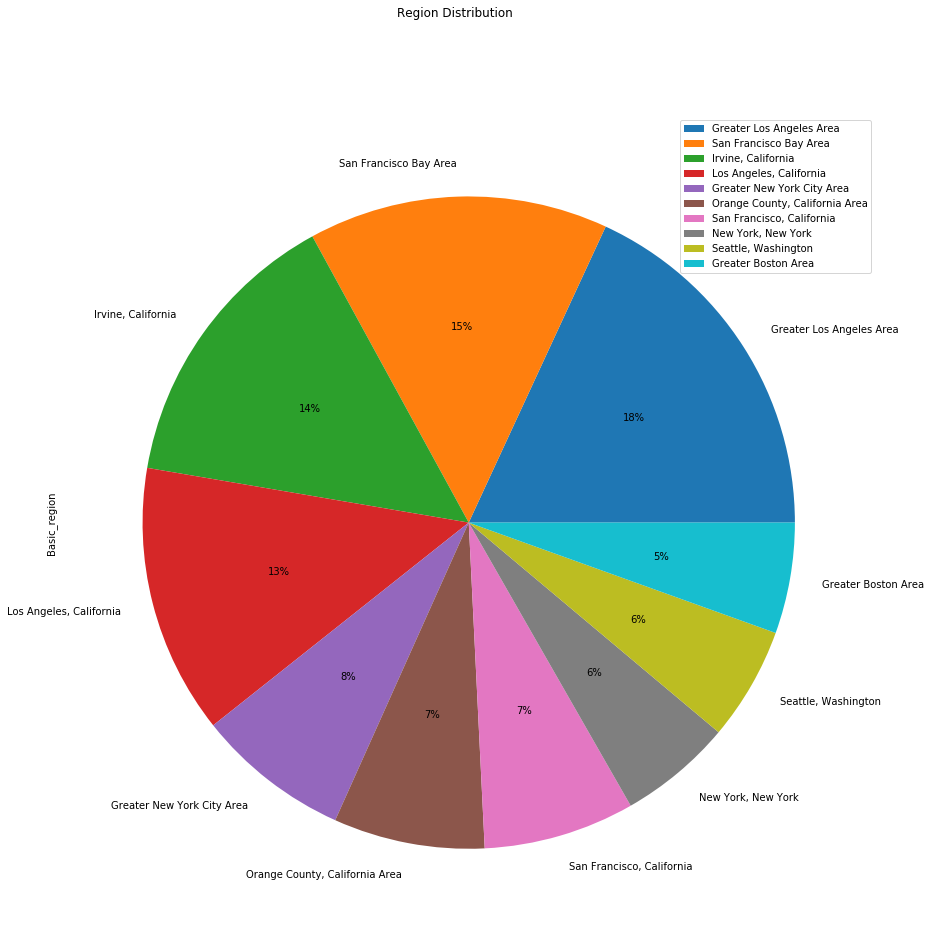

In [559]:
region1.plot(kind='pie',subplots=True,title = 'Region Distribution',figsize=(15,15),autopct='%1.0f%%')

## WordCloud for Summary

In [266]:
ws = list(profile['Basic_summary'])
ws2 = []
for x in ws:
    if x != 'Null':
        ws2.append(x)

In [267]:
texts = ' '.join(ws2)

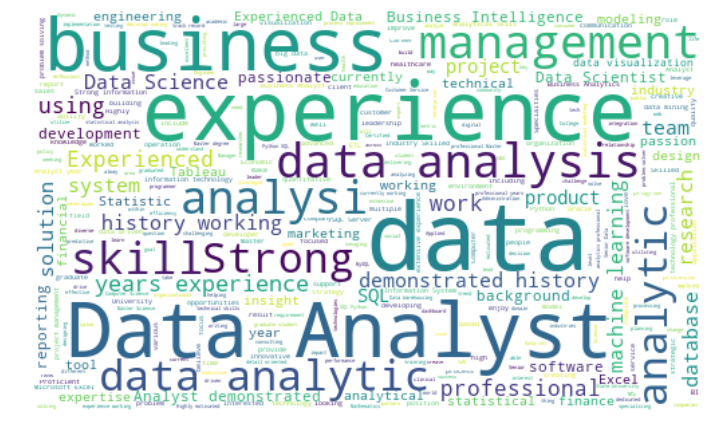

In [268]:
wordcloud = WordCloud(max_font_size=70, max_words=300, background_color="white",width=500, height=300).generate(texts)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
plt.savefig()

# Wordcloud for Skills

In [568]:
skills = profile[['Skill_name_1','Skill_name_2','Skill_name_3']]
skill_1 = list(skills['Skill_name_1'])
skill_2 = list(skills['Skill_name_2'])
skill_3 = list(skills['Skill_name_3'])
l= []
for x in skill_1:
    if x != 'Null':
        l.append(x)
for x in skill_2:
    if x != 'Null':
        l.append(x)
for x in skill_3:
    if x != 'Null':
        l.append(x)


In [571]:
pd.Series(l).value_counts().head(10)

DataAnalysis       389
SQL                243
MicrosoftExcel     208
MicrosoftOffice    208
R                  148
Python             137
Research            93
Leadership          85
Tableau             74
CustomerService     72
dtype: int64

In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [56]:
import os
os.getcwd()

'/Users/guanhangchen/Desktop/Data and Programming Analytics'

In [219]:
rm_mask = np.array(Image.open('/Users/guanhangchen/Desktop/Data and Programming Analytics/real.png'))

In [220]:
text = ' '.join(l)

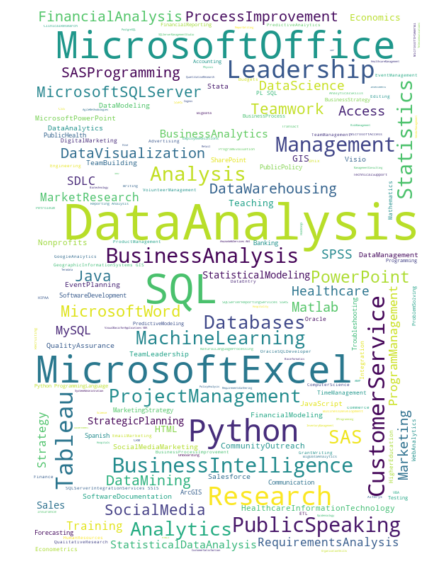

In [575]:
wordcloud = WordCloud(max_font_size=70, max_words=300, background_color="white",mask=rm_mask,width=500, height=300).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Degree Distribution

In [324]:
degree = profile[['Education_degree_1','Education_degree_2','Education_degree_3']]
degrees = list(degree['Education_degree_1'])+list(degree['Education_degree_2'])+list(degree['Education_degree_3'])
de = []
for i in degrees:
    if i != 'Null':
        de.append(i)

In [325]:
de_2 = pd.Series(de)
de_2.value_counts().head(50)
PhD = 19 + 9
Master = 131+87+61+59+37+33+25+22+21+19+17+16+13+12+10+9
Bachelor = 143+140+109+97+69+64+100+44+38+33+31+25+25+24+42+18+15+13+11+9+9+8+8
print(PhD)
print(Master)
print(Bachelor)

28
572
1075


In [323]:
degree_dis = pd.DataFrame([28,572,1075],index=['PhD','Master','Bachelor'],columns=['Degree'])
degree_dis

,Degree
PhD,28
Master,572
Bachelor,1075


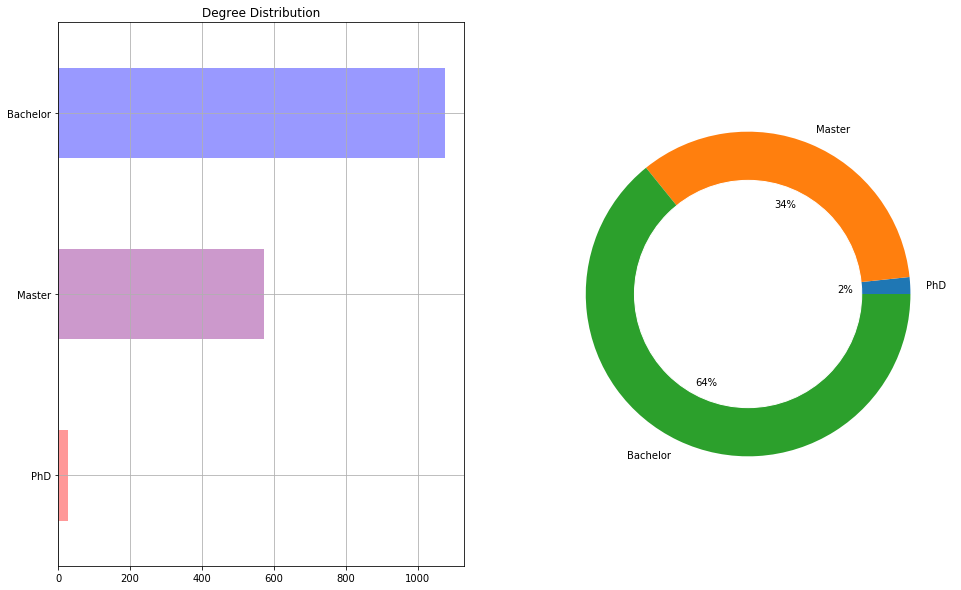

<Figure size 432x288 with 0 Axes>

In [563]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize = (16,10))
degree_dis.plot(ax = axes[0],kind='barh',title = 'Degree Distribution', color = ('red','purple','blue'),legend=False,alpha=0.4,grid = True)
axes[1].pie(degree_dis,labels=['PhD','Master','Bachelor'],autopct='%1.0f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
plt.tight_layout()

## Education Major

In [362]:
education = profile[['Education_major_1','Education_major_2','Education_major_3']]
education1 = pd.DataFrame([x for x in education['Education_major_1'] if x != 'Null'],columns=['Major'])
education2 = pd.DataFrame([x for x in education['Education_major_2'] if x != 'Null'],columns=['Major'])
education3 = pd.DataFrame([x for x in education['Education_major_3'] if x != 'Null'],columns=['Major'])

ed1 = pd.DataFrame(education1['Major'].value_counts()).head(10)
ed2 = pd.DataFrame(education2['Major'].value_counts()).head(10)
ed3 = pd.DataFrame(education3['Major'].value_counts()).head(10)

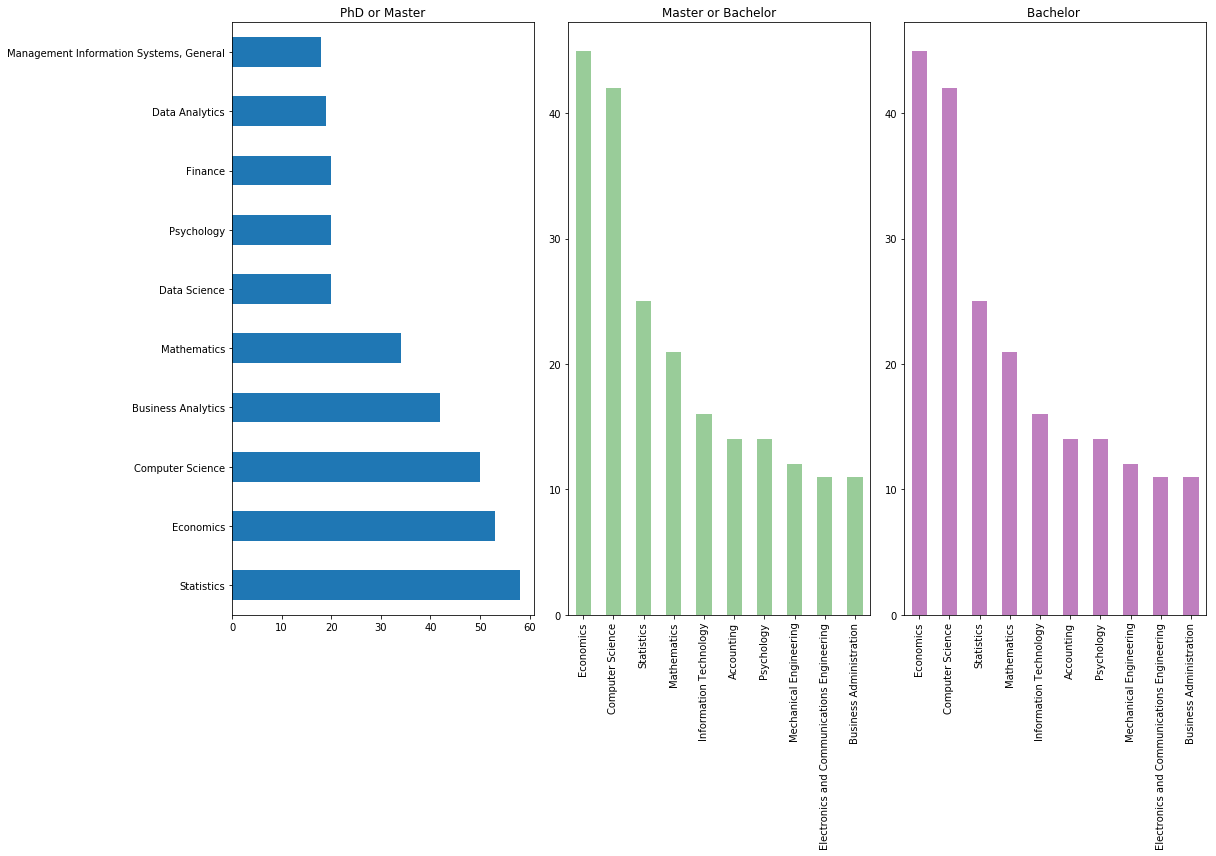

In [564]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (17,12))
ed1.plot(kind='barh',ax=axes[0],title = 'PhD or Master',legend = False)
ed2.plot(kind='bar',ax=axes[1],title = 'Master or Bachelor',color = 'green',alpha = 0.4,legend = False)
ed2.plot(kind='bar',ax=axes[2],title = 'Bachelor ',color = 'purple',alpha = 0.5,legend = False)

plt.tight_layout()

## Experience Duration

In [420]:
profile[['Experience_duration_1','Experience_duration_2','Experience_duration_3','Experience_duration_4','Experience_duration_5']]
duration1 = list(profile['Experience_duration_1'])+list(profile['Experience_duration_2'])+list(profile['Experience_duration_3'])+list(profile['Experience_duration_4'])+list(profile['Experience_duration_5'])
duration = [x for x in duration1 if x != 'Null']
ed = pd.Series(duration).value_counts()
e_duration = pd.DataFrame(ed,columns=['Frequency'])
e_duration2 = e_duration.head(10)

Text(0.5, 1.0, 'Frequency of Experience_Duration')

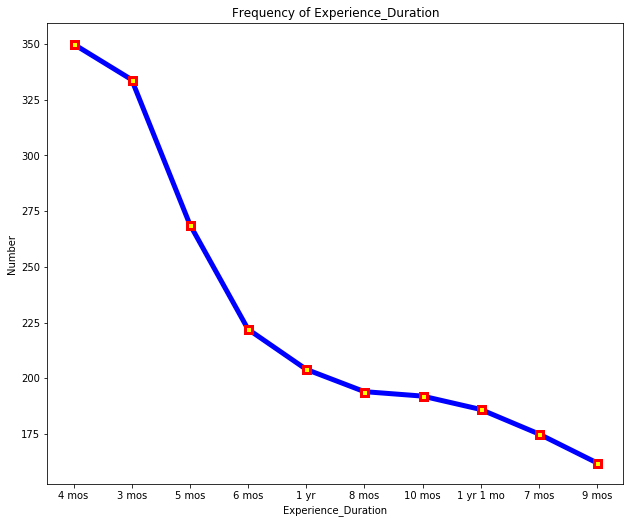

In [437]:
fig = plt.figure(figsize=(10,8))
axes = fig.add_axes([0.2,0.2,0.8,0.8])
axes.plot(e_duration2,'b.-',lw = 5, ls='-',marker='s',markersize = 7, markerfacecolor='yellow',markeredgewidth = 3,markeredgecolor='red')
axes.set_xlabel('Experience_Duration')
axes.set_ylabel('Number')
axes.set_title('Frequency of Experience_Duration')